# Introduction

This study aims to classify astronomical objects using different machine-learning models and using only their apparent magnitudes which are a measure of how bright they appear in the sky. The brighter the object the lower the number. 

Different types of astronomical objects have different spectra. We know that light is a spectrum of wavelengths with radio waves at the wide wavelength end and gamma rays at the short end. And the way that different astronomical objects emit light changes from the type of objects they are. The spectra of an object can tell the type of object they are. In the case of stars in the visible part of the spectrum, it can tell us about their temperature, their metalicity (how many heavy elements the star has) and their age. 

So the spectra of astronomical objects can tell us a lot about the object. The issue with the spectra is that the catalogues of spectra are not as large as the catalogues of apparent magnitudes. They do not sample faint sources well either. This is why this study attempts to classify astronomical objects by their apparent magnitudes in the visible range of the spectrum. 

The idea behind it is that the apparent magnitudes sample different parts of the spectrum and can give a rough estimate of the shape of the spectra. So by using apparent magnitudes, I am to classify stellar objects. The level of classification can be as detailed as needed but for this study, I chose sources that fall into three cantegoties: star, galaxy and QSO. The QSOs are objects where their galactic centre which is believed to be a supermassive black hole emits so much light that it dwarfs the light emitted by the stars in the galaxies it resides in.

I also add colours to the dataset. Colour in astrophysics is defined as the difference between the magnitudes of two passbands. In order to study the effects of adding colour to our analysis.  

The data was obtained using the Skyserver from the Sloan Digital Sky Survey (SDSS) using the SQL query. In the SQL query, I specified no missing values of the redshift or the five bands (u,g,r,i,z) and an error on the magnitues of < than 0.1. Also, the dered values were obtained to account for galactic extinction. For each spectral class (star, galaxy and QSO), 5000 random sources were obtained; giving a total of 15000 sources. The file sql_skyserver_sdss.odt has the sql script used in the CasJobs website to retrieve the data.


# EDA

In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import table
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
sns.set()
%matplotlib inline

In [67]:
#loading files
filepath= "/home/veroastro/Documents/spectraTypes/MLphotometry/data/"
galaxy = pd.read_csv(filepath+"galaxy_rand.csv")
star = pd.read_csv(filepath+"star_rand.csv")
QSO = pd.read_csv(filepath+"QSO_rand.csv")
galaxy.head()

,objID,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,z,zErr,zWarning,class,subClass,photoZ,photoErr
0,1237667107964059994,3,19.14665,0.042552,18.01715,0.008234,17.39453,0.007353,17.00409,0.007467,16.85641,0.022810,0.190743,0.000012,0,GALAXY,STARBURST,0.144220,0.026946
1,1237659162273644771,3,18.67741,0.053067,17.09810,0.007615,16.40739,0.005788,16.03506,0.005946,15.74409,0.016097,0.081476,0.000017,0,GALAXY,STARFORMING,0.063800,0.021013
2,1237658492812787850,3,20.20969,0.091168,18.45586,0.009713,17.64484,0.007430,17.19775,0.006701,16.86672,0.016107,0.064705,0.000018,0,GALAXY,STARFORMING,0.088891,0.025775
3,1237662474236723494,3,19.12979,0.090943,17.60516,0.010892,16.96834,0.008156,16.65428,0.008857,16.42171,0.028540,0.058028,0.000045,0,GALAXY,NaN,0.044818,0.021365
4,1237668299277402225,3,19.13715,0.056692,17.72644,0.007490,17.23448,0.006801,16.89653,0.007365,16.69554,0.020405,0.086751,0.000010,0,GALAXY,STARFORMING,0.071907,0.017355


In [68]:
# Concatenating the three dataframes
data = pd.concat([star, QSO, galaxy])
#scrambling the data so that they are not ordered by class
data = data.sample(frac=1)
data.head()

,objID,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,z,zErr,zWarning,class,subClass,photoZ,photoErr
593,1237663786888069314,3,19.95293,0.094998,18.34754,0.012044,17.45104,0.007836,16.90666,0.006807,16.64475,0.015077,0.090987,0.000030,0,QSO,STARBURST BROADLINE,0.134275,0.033706
3521,1237661065480503326,3,19.56179,0.041360,19.09546,0.011639,18.56625,0.010231,18.29158,0.010543,18.08524,0.030260,0.420987,0.000097,0,QSO,BROADLINE,0.258644,0.048515
1533,1237671260130902257,3,19.42688,0.032403,19.22824,0.013585,18.69330,0.010978,18.32514,0.010438,18.13529,0.025188,0.241567,0.000065,0,QSO,BROADLINE,0.409596,0.083341
1076,1237655130374734110,3,19.09814,0.035577,17.35526,0.005483,16.56037,0.004187,16.16904,0.004317,15.86788,0.008584,0.048085,0.000014,0,GALAXY,NaN,0.061863,0.015733
4733,1237651736833425580,3,19.14784,0.049502,17.78570,0.007497,17.15456,0.006501,16.78763,0.007028,16.57100,0.022794,0.077079,0.000012,0,GALAXY,STARFORMING,0.084669,0.020149


In [69]:
data.shape

(13744, 19)

In [70]:
cols= ['zWarning','objID']
data_cl = data.drop(columns=cols)
data_cl.shape

(13744, 17)

In [71]:
data_cl.head()

,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,z,zErr,class,subClass,photoZ,photoErr
593,3,19.95293,0.094998,18.34754,0.012044,17.45104,0.007836,16.90666,0.006807,16.64475,0.015077,0.090987,0.000030,QSO,STARBURST BROADLINE,0.134275,0.033706
3521,3,19.56179,0.041360,19.09546,0.011639,18.56625,0.010231,18.29158,0.010543,18.08524,0.030260,0.420987,0.000097,QSO,BROADLINE,0.258644,0.048515
1533,3,19.42688,0.032403,19.22824,0.013585,18.69330,0.010978,18.32514,0.010438,18.13529,0.025188,0.241567,0.000065,QSO,BROADLINE,0.409596,0.083341
1076,3,19.09814,0.035577,17.35526,0.005483,16.56037,0.004187,16.16904,0.004317,15.86788,0.008584,0.048085,0.000014,GALAXY,NaN,0.061863,0.015733
4733,3,19.14784,0.049502,17.78570,0.007497,17.15456,0.006501,16.78763,0.007028,16.57100,0.022794,0.077079,0.000012,GALAXY,STARFORMING,0.084669,0.020149


In [72]:
# Encoding the classes to integers
def type_to_value(n):
    if n == 'STAR':
        return 1
    elif n == 'QSO':
        return 2
    elif n == 'GALAXY':
        return 3
    
data_cl['nClass'] = [type_to_value(n) for n in data_cl['class']]

In [73]:
# Removing columns: errors, redshift and class data
data1 = data_cl.drop(['type','err_u', 'err_g', 'err_r', 'err_i', 'err_z','z', 'zErr', 'class', 'subClass','photoZ','photoErr'], axis = 1)
data1.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass
593,19.95293,18.34754,17.45104,16.90666,16.64475,2
3521,19.56179,19.09546,18.56625,18.29158,18.08524,2
1533,19.42688,19.22824,18.69330,18.32514,18.13529,2
1076,19.09814,17.35526,16.56037,16.16904,15.86788,3
4733,19.14784,17.78570,17.15456,16.78763,16.57100,3


In [74]:
# Description of the cleaned dataset
data1.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass
count,13744.000000,13744.000000,13744.000000,13744.000000,13744.000000,13744.000000
mean,19.123395,17.910162,17.236316,16.870943,16.628750,2.091385
std,1.121857,1.229686,1.299486,1.319692,1.307080,0.792401
min,6.673403,9.884518,9.321852,9.242759,9.800303,1.000000
25%,18.583655,17.267795,16.485962,16.064055,15.805095,1.000000
50%,19.285505,18.004625,17.246045,16.864670,16.626325,2.000000
75%,19.869115,18.632320,18.052302,17.729200,17.508297,3.000000
max,28.846420,21.627410,20.763160,20.886630,20.076770,3.000000


The dereddened magnitudes (or mean brightness) seem to increase from the u band to the z band, with the highest mean brightness in the z band. And the spread of the data (as indicated by the standard deviation) also varies between bands, with the largest spread in the u band and the smallest spread in the z band.

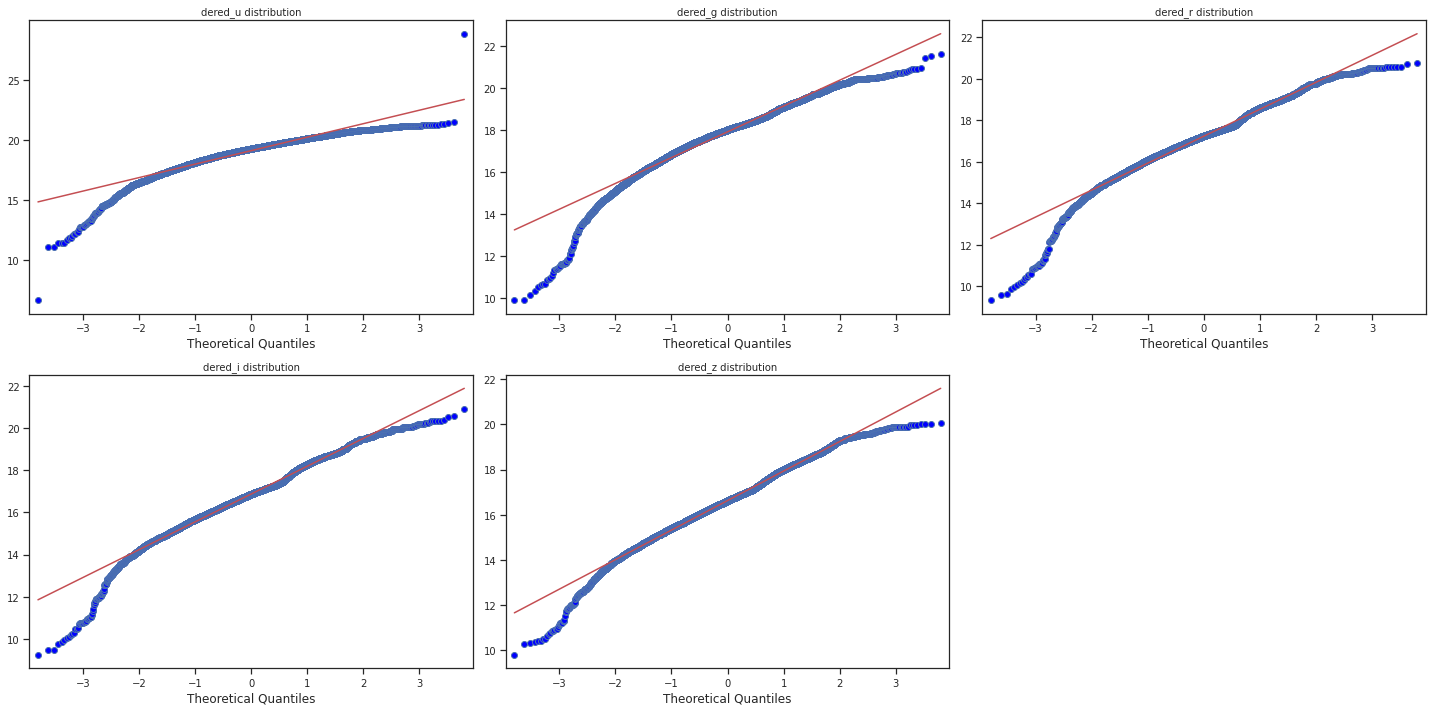

In [75]:
import warnings

# filter out the specific warning message
warnings.filterwarnings("ignore", message="marker is redundantly defined by the 'marker' keyword argument and the fmt string")

# your code that produces the warning

# Create function to plot the qqplots of all columns in the dataset in a subplot
def qq_plots( data: pd.DataFrame,
               rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            qqplot(data[(data.columns)[i]], line='s', ax=ax)
            ax.set_title(f'{(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()
    
# plotting qqplots for each band in the dataset. 

cols= data1.columns[:-1]
no = data1[cols]

qq_plots(data=no,
          rows=2,
          cols=3,
          figsize=(20,10))


The data diverges from the line at the extremes which marks the presence of outliers.The divergence is worst on the u band and somewhat better on the z band. Since error on the bands' magnitudes is small (< 0.1), we can assume that the presence of outliers is not due to error in measurements but an intrinsic property of the sources. 

In [11]:
# Create function to plot the histograms of all columns in the dataset in a subplot
def hist_plots( data: pd.DataFrame,
               rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

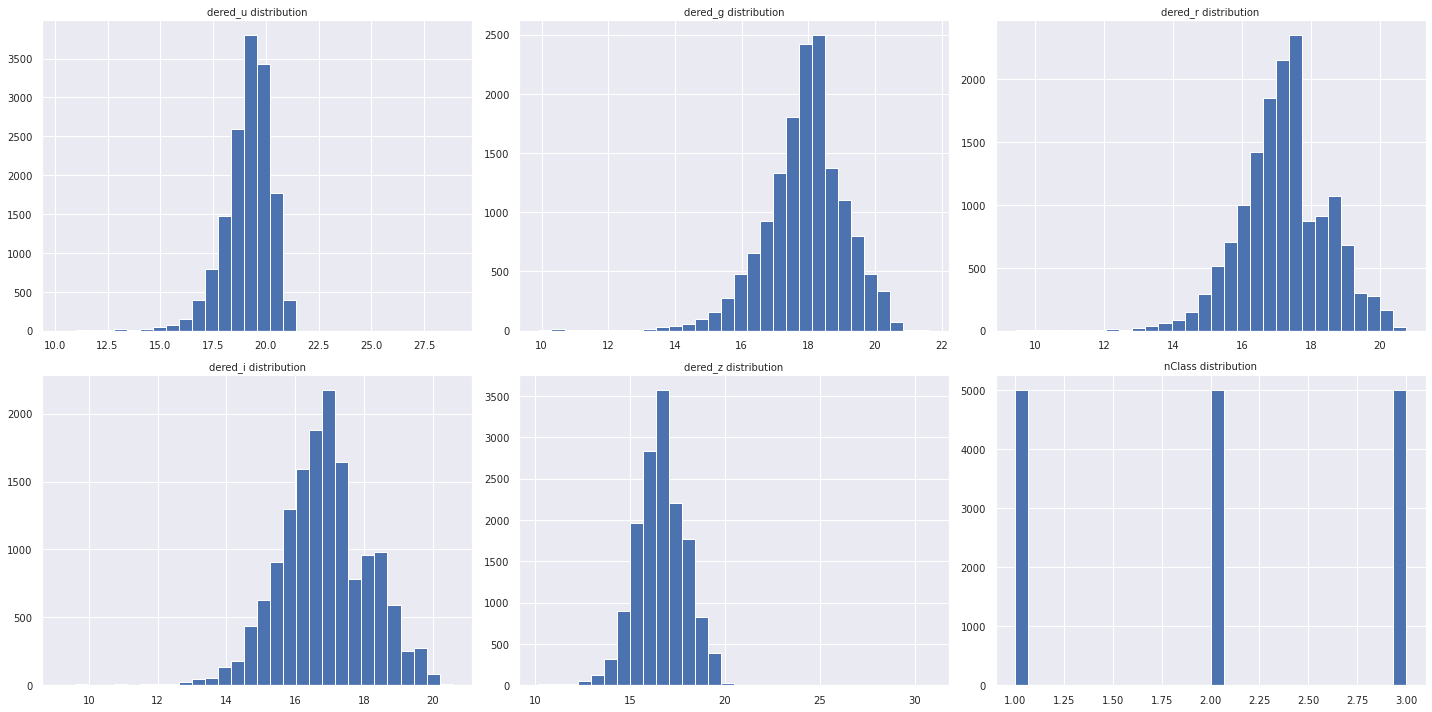

In [12]:
# plotting histograms of the data.

hist_plots(data=data1,
          rows=2,
          cols=3,
          figsize=(20,10))

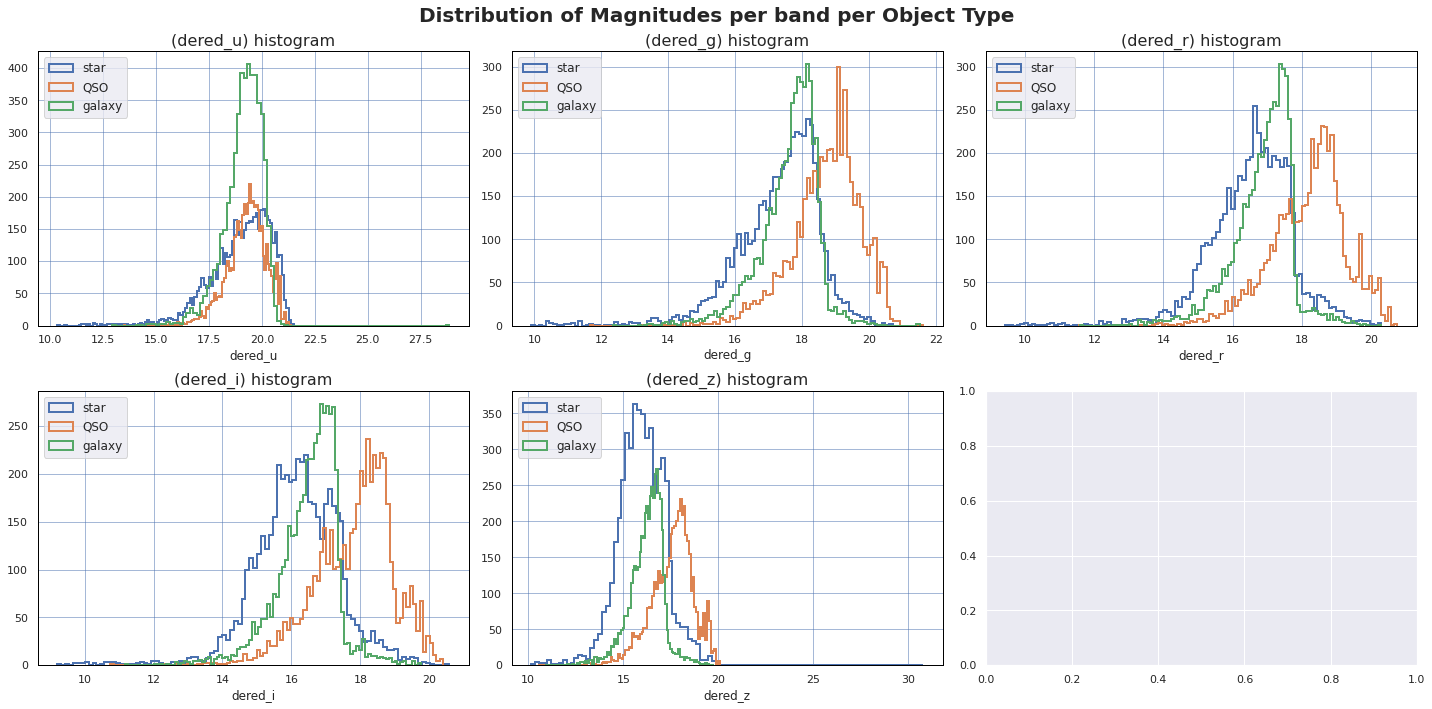

In [13]:
# Create histograms of the colours for each object type in the same plot
# Create boolean series for each of the classes of objects
star = data1['nClass']  == 1
QSO = data1['nClass']  == 2
galaxy = data1['nClass']  == 3
cols = ['dered_u','dered_g','dered_r','dered_i','dered_z']
bins= 100
# Create subplots and plot histograms
fig,axs = plt.subplots(2,3, figsize=(20,10), edgecolor='black')
axs = axs.ravel()

for i, n in enumerate(cols):
    ax = axs[i]
    X = data1[n]
    if i < len(cols):
        #create the histograms for the object type per band
        ax.hist(X[star], bins,histtype='step', linewidth=2,label='star')
        ax.hist(X[QSO], bins,histtype='step', linewidth=2, label='QSO')
        ax.hist(X[galaxy], bins,histtype='step', linewidth=2, label='galaxy')
        # Making it pretty with frame and grid
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_linewidth(1)
        ax.spines['right'].set_linewidth(1)
        ax.spines['bottom'].set_linewidth(1)
        ax.spines['left'].set_linewidth(1)
        ax.grid(color='b', linestyle='-', linewidth=0.5)
        ax.set_facecolor('xkcd:white')
        #set legend, lables and title
        ax.legend(loc='upper left',fontsize=12)
        ax.set_xlabel(n)
        ax.set_title(f'({n}) histogram', fontsize=16)
    else:
        fig.delaxes(ax=ax)
            
fig.suptitle('Distribution of Magnitudes per band per Object Type', fontsize=20, fontweight="bold")
fig.tight_layout()
plt.show()

The bump on the right of the bands'magnitudes distribution can be explained by the prescence of the QSO distribution that is fainter (higher value of magnitude) than the rest of the distribution in the g, r, i and z bands. While the long left tail can be explained mostly by the star distribution which has a brighter distribution (lower valuue of magnitudes). Since the selection was random, the distribution of magnitudes per class should reflect the actual distribution of objects in the original catalogue. To deal withthe non-normal distribution of the dataset, I will use non-parametric learning algorithms like Decision Trees, Random Forest, Gradient Boosting and Support Vector Machine. 

### Colours

As stated in the introduction, colour is defined as the difference between the magnitudes of two passbands (u, g, r, i, z). The most comon colours are between adjacent bands; therefore (u-g),(g-r),(r-i),(i-z). What do the colours tell us? Mainly, they tell us roughly about the shape of the spectrum of the electromagnetic radiation of the source. In the case of stars, it indicates temperature. In the case of galaxies, it can indicate age and shape of the galaxy. The redder the galaxy, the older the population and or more dust. The bluer the galaxy, the younger the population and or less dust. It is also an indication of starformation within the galaxy. 

In [14]:
# Create a function to calculate the colours of the sources
def compute_colour(row):
    u = row['dered_u']
    g = row['dered_g']
    r = row['dered_r']
    i = row['dered_i']
    z = row['dered_z']
    return pd.Series({'u-g': u - g, 'g-r': g - r, 'r-i': r - i, 'i-z': i - z})
# Apply the function compute_colour
colour_ind = data1.apply(compute_colour, axis=1)
# Create new dataframe with the colours added
data_colour = pd.concat([data1,colour_ind], axis=1)
data_colour.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass,u-g,g-r,r-i,i-z
2674,20.16157,17.64444,16.51864,16.05289,15.80521,1,2.51713,1.12580,0.46575,0.24768
2161,18.72804,17.51893,16.84604,16.49698,16.23252,3,1.20911,0.67289,0.34906,0.26446
2619,19.33861,19.15695,18.99216,18.87761,18.36061,2,0.18166,0.16479,0.11455,0.51700
3750,19.00525,17.82162,17.40534,17.14458,17.07733,3,1.18363,0.41628,0.26076,0.06725
1432,19.48119,17.33215,16.47258,16.17380,16.03594,1,2.14904,0.85957,0.29878,0.13786


In [15]:
data_colour.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,nClass,u-g,g-r,r-i,i-z
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.132223,17.882387,17.202859,16.839213,16.602145,2.000000,1.249836,0.679528,0.363646,0.237068
std,1.125658,1.220124,1.281371,1.306438,1.303870,0.816524,0.709817,0.339859,0.230364,0.245623
min,10.332040,9.905839,9.427466,9.207663,10.161530,1.000000,-2.547550,-2.964630,-3.667220,-16.663690
25%,18.579792,17.236185,16.457560,16.026708,15.763758,1.000000,0.621070,0.458933,0.251515,0.133340
50%,19.293760,17.976970,17.219915,16.841205,16.600990,2.000000,1.286580,0.668125,0.371695,0.240170
75%,19.888120,18.594875,17.952092,17.639647,17.438868,3.000000,1.775740,0.887230,0.437630,0.329830
max,28.846420,21.627410,20.763160,20.580770,30.781270,3.000000,7.412600,5.524000,3.697435,3.712550


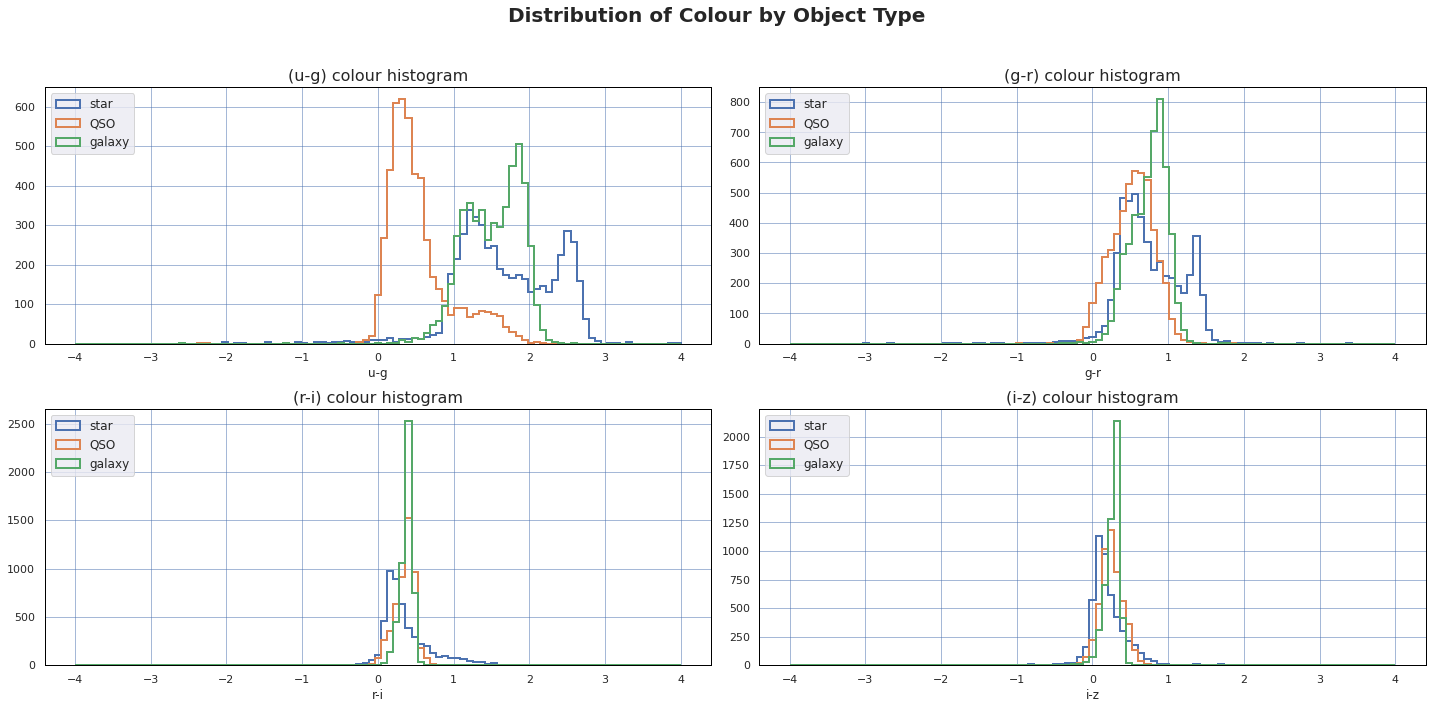

In [16]:
# Create histograms of the colours for each object type in the same plot
# Create boolean series for each of the classes of objects
star = data_colour['nClass']  == 1
QSO = data_colour['nClass']  == 2
galaxy = data_colour['nClass']  == 3
colour = ['u-g','g-r','r-i','i-z']

# Create subplots and plot histograms
bins = np.linspace(-4, 4, 100)
fig,axs = plt.subplots(2,2, figsize=(20,10), edgecolor='black')
axs = axs.ravel()

for i, n in enumerate(colour):
    ax = axs[i]
    X = data_colour[n]
    #create the histograms for the object type per colour
    ax.hist(X[star], bins,histtype='step', linewidth=2,label='star')
    ax.hist(X[QSO], bins,histtype='step', linewidth=2, label='QSO')
    ax.hist(X[galaxy], bins,histtype='step', linewidth=2, label='galaxy')
    # Making it pretty with frame and grid
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.grid(color='b', linestyle='-', linewidth=0.5)
    ax.set_facecolor('xkcd:white')
    #set legend, lables and title
    ax.legend(loc='upper left',fontsize=12)
    ax.set_xlabel(n)
    ax.set_title(f'({n}) colour histogram', fontsize=16)
    
fig.suptitle('Distribution of Colour by Object Type', fontsize=20, fontweight="bold")
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For stars, in the (u-g) and (g-r) distributions, we can see bimodality which indicates the temperature of the star whether is a hot blue star (to the left of the distribution) or a cold red star(to the right). The distributions of (r-i) and (i-z) show this bimodality less and in fact, the distributions are more congruent with a positive skewed distribution. As the colours move more to the infrared side of the bands' spectrum, they are less sensitive to the temperature and more sensitive to interstellar dust, metalicity and age.

For QSOs, the (u-g) distribution peak is much bluer than that of stars and galaxies.  It is as expected since what we see in QSOs are the active galactic nuclei(AGN, supermassive black holes)  that outshine the stars of their host galaxies. The radiation peaks at the blue end of the spectrum.  There is a small second population that is redder (to the left) than the rest of the population and this can be due to the fact that there is a combination of radiation from the AGN and the host galaxies. In the (g-r), we are seeing more of the radiation of the host galaxies but the distribution is still bluer than the galaxy distribution. In the distributions of (r-i) and (i-z), the galaxy and QSOs distributions are indistinguishable. Here, we are seeing the host galaxy radiation. 

For galaxies, there is a bimodal distribution in the (u-g) and (g-r). What we are seeing here is two populations; one population of young blue galaxies and the other of old red galaxies. On the other hand, the distributions of (r-i) and (i-z) show a very narrow distribution with a high peak. This could be due to the fact that we are sampling interstellar dust. Dust can absorb or scatter the light emitted by stars in a galaxy which makes the galaxy appear redder than it actually is. These distributions can be affected by the limited wavelength coverage of the bands.


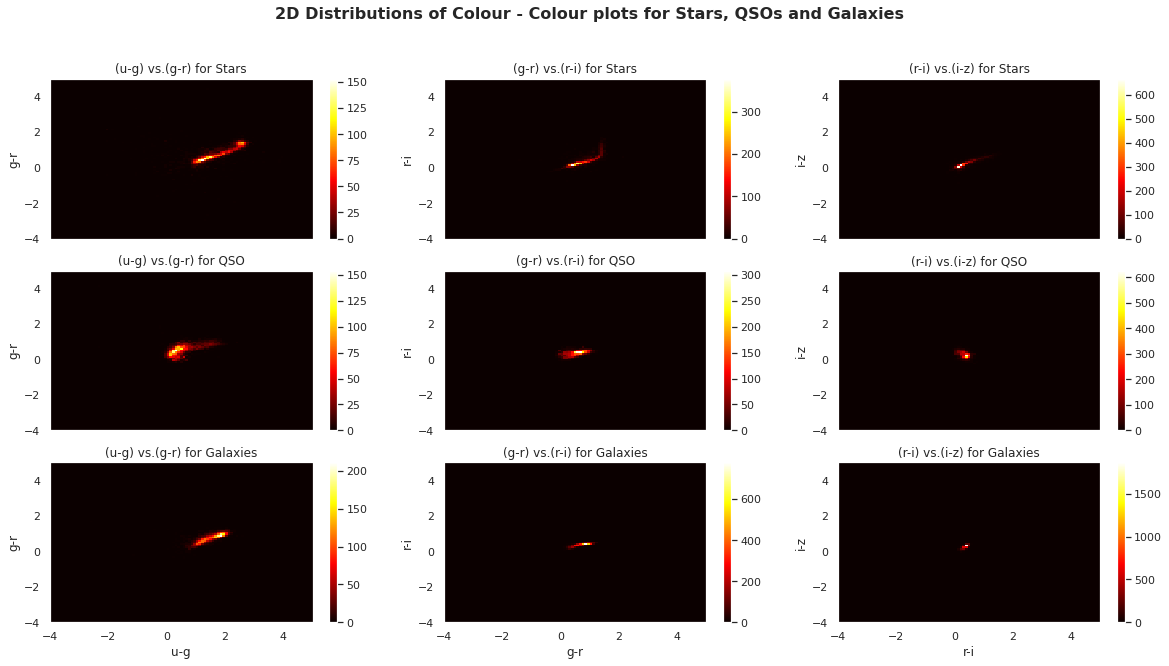

In [17]:
# Create 2D distributions for each colour vs colour for each object type
fig, axs = plt.subplots(3, 3, figsize=(20, 10), sharex='col')

bins = np.linspace(-4, 5, 100)

classes = [star, QSO, galaxy]
objects = ['Stars', 'QSO', 'Galaxies']

for i in range(len(colour)-1):
    for j, n in enumerate(classes):
        
        h = axs[j, i].hist2d(data_colour[colour[i]][n], data_colour[colour[i + 1]][n], bins, cmap='hot')
        
        # Set labels for each subplot
        axs[j, i].set_title(f'({colour[i]}) vs.' f'({colour[i+1]}) for ' f'{objects[j]}')
        axs[j, i].set_ylabel(colour[i + 1])
        if j>= 2 :
                axs[j,i].set_xlabel(colour[i])
        
        # Add colorbars to each subplot
        fig.colorbar(h[3], ax=axs[j, i])    
            

fig.suptitle('2D Distributions of Colour - Colour plots for Stars, QSOs and Galaxies', fontsize=16, fontweight="bold")
#plt.savefig('/home/veroastro/Documents/spectraTypes/images/2dH_colour.pdf')
# Show the plot
plt.show()

Colour-colour plots are tools that help us in the study of the properties of astronomical objects and their evolution over time. In the case of stars, the (u-g) vs. (g-r) plot distinguishes between the hot, blue stars and the cold red stars. The position of a star in the plot depends on its temperature and the composition of its atmosphere, with hotter stars on the lower left side and colder stars on the upper right side. The (g-r) vs. (r-i) plot differentiates between stars of different temperatures and spectral types. The vertical axis (r-i) represents the star's metallicity, with metal-poor stars located towards the bottom and metal-rich stars towards the top. The (r-i) vs. (i-z) plot shows how stars of different colours and metallicities are affected by interstellar dust. Dust extinction causes reddening, which shifts colours to the red side of the spectrum.  Stars with higher levels of dust extinction will be located on the upper right side. The plot can also reveal any possible relationships between dust extinction and the age or metallicity of stars.

In the case of QSOs, the (u-g) vs. (g-r) plot shows that most of the QSOs lie in a region with a tail that extends to the left and upper side (redder direction). This tail can be caused by two things: higher redshift (distance to the object) or that the spectra of these sources have emissions from the host galaxies too. This is more visible in the (g-r) vs. (r-i) plot where the plot is similar to that of the galaxies plot. The (r-i) vs. (i-z) plot shows a distribution that is very similar to that of galaxies, as we are primarily sampling the host galaxy radiation.

In the case of galaxies, the (u-g) vs. (g-r) plot shows a wide range that goes between the blue cloud (young, star-forming galaxies) in the left and down and the red sequence (older and more passive galaxies) in the right and upper side. In the (g-r) vs. (r-i) plot, the  (g-r) colour is more sensitive to the age of the galaxy and the  (r-i) is more sensitive to their metallicity. The (r-i) vs. (i-z) shows how galaxies are affected by interstellar dust.


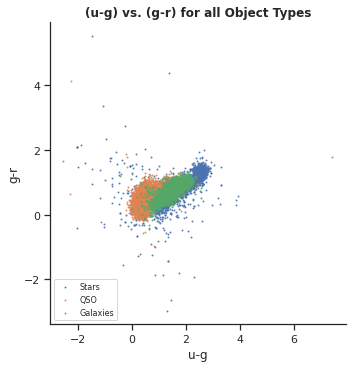

In [18]:
#Scatter plot hued by classes

sns.set_style("ticks")
  
sns.lmplot( x="u-g", y="g-r", data= data_colour, fit_reg=False, hue='nClass', legend=False, scatter_kws={"s": 1})

# Add title and legend
plt.title('(u-g) vs. (g-r) for all Object Types', fontweight="bold")
plt.legend(objects, fontsize=8, loc='lower left')
#plt.savefig('/home/veroastro/Documents/spectraTypes/images/scatter_classes.pdf')
plt.show()

From this colour-colour plot, we can see how that different sources mainly occupy different regions of colour-colour space. Although the regions are not well defined and overlap. But it might help in the classification of the classes.

# Building the models

## Prepping the data

In [19]:
# Separating the features and the labled data and scaling the data
from sklearn.preprocessing import RobustScaler
cols= data1.columns[:-1]
X = data1[cols]
scaler = RobustScaler()
X_t = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_t, columns = X.columns)


In [20]:
# split the data in train and test subsets
from sklearn.model_selection import StratifiedShuffleSplit


# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=3, 
                                          test_size=0.2, 
                                          random_state=42)



train_idx, test_idx = next(strat_shuf_split.split(X_t,data1['nClass']))
print(train_idx.shape)
print(test_idx.shape)

X_train = X_scaled[cols].iloc[train_idx]
y_train = data1['nClass'].iloc[train_idx]
X_test  = X_scaled[cols].iloc[test_idx]
y_test  = data1['nClass'].iloc[test_idx]

X_train.head()



(12000,)
(3000,)


,dered_u,dered_g,dered_r,dered_i,dered_z
1443,0.498549,0.695931,0.688826,0.670335,0.311058
8086,0.490217,0.645022,0.623956,0.605525,0.269451
9089,0.498439,0.715182,0.716810,0.695456,0.324817
4861,0.501893,0.811951,0.850646,0.839515,0.411350
247,0.536408,0.795763,0.837940,0.839886,0.413506


In [21]:
# Prepping the colour data set.
X_colour = data_colour.drop(['nClass'], axis = 1)#pd.concat([X,colour_indices], axis=1)
print(X_colour.head())

# Normalising the colour dataset
Xc_t = scaler.fit_transform(X_colour)
Xc_scaled = pd.DataFrame(Xc_t, columns = X_colour.columns)

# Splitting colour dataset into train and test.
X_train_c = Xc_scaled.iloc[train_idx]
X_test_c  = Xc_scaled.iloc[test_idx]

       dered_u   dered_g   dered_r   dered_i   dered_z      u-g      g-r  \
2674  20.16157  17.64444  16.51864  16.05289  15.80521  2.51713  1.12580   
2161  18.72804  17.51893  16.84604  16.49698  16.23252  1.20911  0.67289   
2619  19.33861  19.15695  18.99216  18.87761  18.36061  0.18166  0.16479   
3750  19.00525  17.82162  17.40534  17.14458  17.07733  1.18363  0.41628   
1432  19.48119  17.33215  16.47258  16.17380  16.03594  2.14904  0.85957   

          r-i      i-z  
2674  0.46575  0.24768  
2161  0.34906  0.26446  
2619  0.11455  0.51700  
3750  0.26076  0.06725  
1432  0.29878  0.13786  


## Building Models

To classify the data, I build several Machine Learning models. I use Logistic Regression, Random Forest Classifier, Decision Tree Classifier, Gradient Boosting Classifier and Suppor Vector Machine.

To optimize the performance of each model, I fine-tuned the hyperparameters of each model using GridSearchCV. And even if it does crossvalidation on the dataset, I still divided the data 80% for training and 20% for testing, in order to test the model on new data.


### Decision Tree Classifier

A decision tree is a non-parametric (it means it does not make particular assumptions about the form of mapping function)learning algorithm. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. The decision tree starts with a root node with outgoing branches to the internal nodes. Both nodes then conduct evaluations to form homogenous subsets(leaf nodes). The operation splits the data recursively until there are only pure leaf nodes (data of only one class).The more complex the tree, the more it can lead to overfitting.  

The parameters that are fine-tuned by GridSearchCV are:
* criterion which measures the quality of a split. 
* max_depth which is the maximum depth of the tree. The range chosen is from 1 to 500 in steps of 5. 
* max_features which is number of features taken into consideration when looking for the best split. 'sqrt' is the square root of the number of features and 'log2' is the log with base 2 of the number of features.

In [23]:
# Importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Defining the hyperparameters to be tuned using GridSearchCV
DT_param = {'criterion' : ['gini', 'entropy'],
            'max_depth':range(1, 500, 5),
            'max_features': [ 'sqrt', 'log2']}
# Creating an instance of GridSearchCV for Decision Tree Classifier
DT_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=DT_param,
                  scoring='accuracy',
                  n_jobs=-1)
# Fitting the GridSearchCV object on the training data
DT = DT_grid.fit(X_train, y_train)

In [24]:
# Printing the best parameters and its accuracy.
#GR_dt.tree_.node_count, GR_dt.tree_.max_depth
DT.best_params_ ,DT.best_score_

({'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt'},
 0.8164166666666667)

In [27]:
from sklearn.metrics import classification_report
#Predict y values (classes) using the model obtained.
y_pred_dt = DT.predict(X_test)
#Check predicted values of the test data with the actual values. 
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           1       0.86      0.82      0.84      1000
           2       0.86      0.85      0.86      1000
           3       0.75      0.79      0.77      1000

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



The test accuracy is 0.82. It means that 18% of the objects are misclassified. From the precision column, the model is best at classifying QSOs(class 2) and stars(class 1) and worst at galaxies (class 3). Recall shows it is best at classifying QSOs  and worst galaxies. The F1 score shows that altogether, it is best at classifying QSOsand stars but worst at classifying galaxies. 

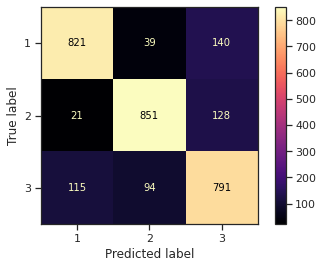

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create confusion matrix
DT_cm = confusion_matrix(y_test, y_pred_dt)
# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=DT_cm,
                              display_labels=DT_grid.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

Looking at the true positives (True label = Predicted Label), class 2(QSO) has the highest number and class 3 (galaxies) has the lowest numbers. Class 1 (stars) are more often misclassified as class 3. Class 2 are more often misclassified as class 3.

### Random Forest Classifier
    
Random Forest is an essemble learning algorithm. This means that it combines the prediction of multiple models. In this case, it combines different decision trees to obtain more acurate results and control overfitting. By default, bootstrap is said to True which means that a subsample is used for each tree rather than the entire datasaet.
I set 
* oob_score to True which is the out of bag score. The OOB score is an estimate of the generalization performance of the model on new data.
* warm_start to True whichs reuse the solution of the previous call to fit and add more estimators to the ensemble.

The parameters are fine-tuned using  RandomizedSearchCV instead of GridSearchCV because it takes to long to run the model through every combination of parameters. RandomizedSearchCV randomly samples a subset of hyperparameter combinations from a specified search space. The parameters used are:
* n_estimators which is the number of trees in the forest.
* min_samples_split the minimum number of samples required to split an internal node
* max_depth which is the maximum depth of the tree. 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
RF_param_grid = {'n_estimators':range(50,1000, 1),
             'min_samples_split' : [2, 5, 10],
             'max_depth':range(1, 500, 5)}


RF = RandomForestClassifier(oob_score=True,
                            bootstrap = True,
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(RF, param_distributions = RF_param_grid, n_iter = 100, cv = 3, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': 380, 'min_samples_split': 2, 'max_depth': 81}

In [30]:
# best accuracy and oob_score
rf_random.best_score_, rf_random.best_estimator_.oob_score_

(0.8810833333333333, 0.8893333333333333)

In [31]:
#Predict y values (classes) using the model obtained.
y_pred_rf = rf_random.predict(X_test)
#Check predicted values of the test data with the actual values
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           1       0.93      0.90      0.91      1000
           2       0.92      0.89      0.90      1000
           3       0.83      0.88      0.86      1000

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



QSOs(class2) and stars(class1) have a better precision than galaxies(class3). In recall, they have similar values. Stars and QSOs have a better f1 score than galaxies. Overall test accuracy is 0.89.

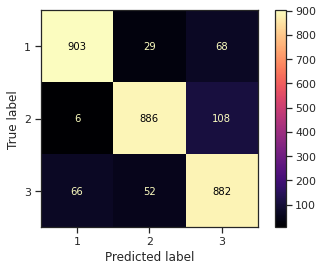

In [32]:
# Create confusion matrix
RF_cm = confusion_matrix(y_test, y_pred_rf)
# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm,
                              display_labels=rf_random.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

Looking at the true positives, class 1 (stars) has the highest number. Class 1 (stars) are more often misclassified as class 3. Class 2 are more often misclassified as class 3.

### Gradient Boosting Classifier (GBC)

It is also and ensamble learning algorithm. It combines weak learners (i.e., decision trees) to create a stronger model. The algorithm first fits a decision tree to the data, then fits a second decision tree to the residuals (errors) of the first tree, and repeats this process to improve the model. The final model is a weighted sum of all the trees, where the weights are determined by the learning rate and the residuals of the previous tree.

It is good to handle complex, high-dimensional datasets and it is robust to outliers. However, it can be computationally expensive and may be prone to overfitting if the hyperparameters are not tuned correctly.

The parameters that are fine-tuned by RandomizedSearchCV are:
* n_estimators which is the number of boosting stages to perform.
* learning_rate which shrinks the contribution of each tree.
* subsample which he fraction of samples to be used for fitting the individual base learners. If the value is less than one then this results in Stochastic Gradient Boosting that uses a random subset of samples to train each base learner instead of using the entire training set. This helps with overfitting.
* max_depth which is the maximum depth of the individual regression estimators.

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Use the random grid to search for best hyperparameters
GBC_param_grid = {'n_estimators': range(5, 150,10),
                  'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                  'subsample': [1.0, 0.5],
                  'max_depth': [2, 5, 8]}


GBC = GradientBoostingClassifier(random_state=42)

GBC_random = RandomizedSearchCV(GBC, param_distributions = GBC_param_grid, n_iter = 100,cv = 3, n_jobs = -1)

# Do the randomize search
gbc = GBC_random.fit(X_train, y_train)

gbc.best_params_ ,gbc.best_score_

({'subsample': 0.5, 'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.1},
 0.8807499999999999)

In [34]:
# Using the best model to predict classes on the test set
y_pred_gbc = gbc.predict(X_test)
#Check predicted values of the test data with the actual values
cr_gbc = classification_report(y_pred_gbc, y_test)
print(cr_gbc)

              precision    recall  f1-score   support

           1       0.90      0.92      0.91       975
           2       0.88      0.93      0.91       951
           3       0.89      0.83      0.86      1074

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



All classes have a similar value of precision. In recall, galaxies have the worst value. The f1 score is better for stars and QSOs. 

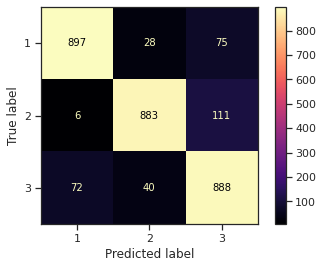

In [35]:
# Create confusion matrix
gbc_cm = confusion_matrix(y_test, y_pred_gbc)
# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=gbc_cm,
                              display_labels=rf_random.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

Looking at the true positives, all classes have roughly similar numbers. Class 1 (stars)d class 2 are more often misclassified as class 3.

### Support Vector Machine (SVM)

SVMs divide the datasets into number of classes in order to find a maximum marginal hyperplane which is the separating hyperplane that is farthest from any training observation. The models first generate hyperplanes iteratively that separates the classes in the best way and then it will choose the hyperplane that segregates the classes correctly.

The parameters that are fine-tuned by GridSearchCV are:
* C which is the regularization parameter which is inversely proportional to C.
* gamma which defines how far influences the calculation of plausible line of separation.
* kernel takes low dimensional input space and transform it into a higher-dimensional space.

In [36]:
from sklearn.svm import SVC
# # Use the random grid to search for best hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
SVM_grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, n_jobs = -1)
  
# fitting the model for grid search
svm = SVM_grid.fit(X_train, y_train)

# print best parameter after tuning and best accuracy
svm.best_params_, svm.best_score_

({'C': 1000, 'gamma': 1, 'kernel': 'rbf'}, 0.8780833333333333)

In [37]:
# Using the best model to predict classes on the test set
y_pred_svm = svm.predict(X_test)
cr_svm = classification_report(y_test, y_pred_svm)
# print classification report
print(cr_svm)

              precision    recall  f1-score   support

           1       0.93      0.83      0.88      1000
           2       0.91      0.89      0.90      1000
           3       0.80      0.90      0.84      1000

    accuracy                           0.87      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.88      0.87      0.87      3000



QSOs(class2) and stars(class1) have a better precision than galaxies(class3). Galaxies do metter in recall than the other two classes with stars at lowest recall value. QSOs have a better f1 score than galaxies. Overall test accuracy is 0.87.

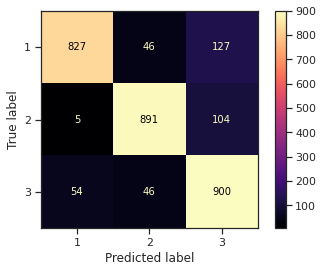

In [38]:
# Create confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm,
                              display_labels=svm.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

In the true positives values, class 3 (galaxy) has the highest number and class 1 (stars) has the lowest numbers. Class 1 (stars)d class 2 are more often misclassified as class 3.

## Testing with Colours

In this section, I check whether adding colours to the data set improves the accuracy of the models. I will use the best two models of the previous section (Random Forest and Gradient Boosting) to classify stellar object with their magnitues and their colours.

### Random Forest

In [39]:
# Running the model defined in the section before for Random Forest but on the dataset with added colours 
rf_colour = rf_random.fit(X_train_c, y_train)
# Printing best parametes and best accuracy
rf_colour.best_params_,rf_colour.best_score_

({'n_estimators': 335, 'min_samples_split': 5, 'max_depth': 36},
 0.9184999999999999)

In [40]:
#Predict y values (classes) using the model obtained.
yc_pred_rf = rf_random.predict(X_test_c)
#Check predicted values of the test data with the actual values
cr_rf_c = classification_report(y_test, yc_pred_rf)
print(cr_rf_c)

              precision    recall  f1-score   support

           1       0.94      0.92      0.93      1000
           2       0.94      0.91      0.92      1000
           3       0.87      0.91      0.89      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



QSOs and stars have the best precision score and galaxies the lowest score. Recall values are similar amongst the classes. F1 score galaxies do slightly worst than stars and QSOs. Stars have the similar value of precision, recall and f1 score. QSOs have better precision than recall and galaxies have better recall than precision. The values of precision, recall and f1 score are very close together. Overall test accuracy is 0.91.

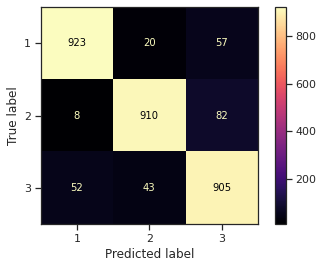

In [41]:
# calculating the confusion matrix
RF_cm_c = confusion_matrix(y_test, yc_pred_rf)
# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm_c,
                              display_labels=rf_random.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

In the true positives, the stars(class1) have the highest count and the lowest value is for galaxies (class3). Stars and QSOs(class2) are mostly misclassified as galaxies. And galaxies are mostly misclassified as stars.

### Gradient Boosting

In [42]:
# Running the model defined in the section before for Gradient Boosting but on the dataset with added colours
gbc_c = GBC_random.fit(X_train_c, y_train)
# Printing best parametes and best accuracy
gbc_c.best_params_ ,gbc_c.best_score_

({'subsample': 0.5, 'n_estimators': 75, 'max_depth': 8, 'learning_rate': 0.1},
 0.9194166666666668)

In [43]:
#Predict y values (classes) using the model obtained.
yc_pred_gbc = GBC_random.predict(X_test_c)
#Check predicted values of the test data with the actual values
cr_gbc_c = classification_report(y_test, yc_pred_gbc)
print(cr_gbc_c)

              precision    recall  f1-score   support

           1       0.95      0.92      0.93      1000
           2       0.93      0.92      0.92      1000
           3       0.87      0.91      0.89      1000

    accuracy                           0.91      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.91      0.91      3000



QSOs have the best precision score and galaxies the lowest score. All classes have similar recall. Stars and QSOs have the highest value of f1 score and galaxies the lowesr value. QSOs have better precision than recall and galaxies have better recall than precision. The values of precision, recall and f1 score are very close together. Overall test accuracy is 0.91.

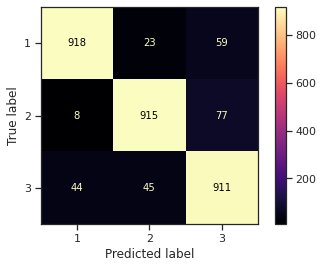

In [44]:
# Plotting confusion matrix
GBC_cm_c = confusion_matrix(y_test, yc_pred_gbc)
# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=GBC_cm_c,
                              display_labels=rf_random.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

All classes have similar counts of true positives. Stars and QSOs are mostly misclassified as galaxies(class3). And galaxies are equally misclassified as stars and QSOs.


### Support Vector Machine

In [45]:
svm_c = SVM_grid.fit(X_train_c, y_train)
# Printing best parametes and best accuracy
svm_c.best_params_ ,svm_c.best_score_

({'C': 1000, 'gamma': 1, 'kernel': 'poly'}, 0.8948333333333333)

In [46]:
#Predict y values (classes) using the model obtained.
yc_pred_svm = SVM_grid.predict(X_test_c)
#Check predicted values of the test data with the actual values
cr_svm_c = classification_report(y_test, yc_pred_svm)
print(cr_svm_c)

              precision    recall  f1-score   support

           1       0.95      0.84      0.90      1000
           2       0.92      0.89      0.90      1000
           3       0.81      0.92      0.86      1000

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



QSOs and stars do better in presicion and worst in recall and the opposite is true foer galaxies. Star and QSOs do better than galaxies in f1 score. Overall accuracy is 0.89.

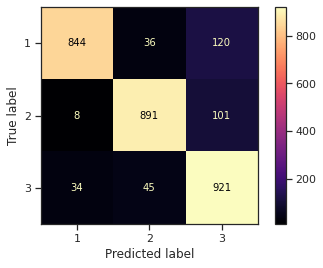

In [47]:
# Plotting confusion matrix
svm_cm_c = confusion_matrix(y_test, yc_pred_svm)
# Create display for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm_c,
                              display_labels=rf_random.classes_)
#Plot confusion Matrix
disp.plot(cmap='magma')
plt.show()

Galaxies(class3) have the highest count of true positives and stars have the lowest. Stars(class1) and QSOs(class2) are mostly missclassifeied as galaxies.

## Comparing models
### Classification Report
#### Without colours

In [49]:
# Class to print it bold and with underline
class bold:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# Printing the classification reports for all models with the dataset without colour
print(bold.BOLD + bold.UNDERLINE + "Decision Tree" + bold.END)
print(cr_dt)
print(bold.BOLD + bold.UNDERLINE + "Random Forest" + bold.END)
print(cr_rf)
print(bold.BOLD + bold.UNDERLINE + "Gradient Boosting" + bold.END)
print(cr_gbc)
print(bold.BOLD +bold.UNDERLINE + "Support Vector Machine" + bold.END)
print(cr_svm)

Decision Tree
              precision    recall  f1-score   support

           1       0.86      0.82      0.84      1000
           2       0.86      0.85      0.86      1000
           3       0.75      0.79      0.77      1000

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000

Random Forest
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      1000
           2       0.92      0.89      0.90      1000
           3       0.83      0.88      0.86      1000

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

Gradient Boosting
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       975
           2       0.88      0.93      0.91       951
           3       0.89      

Looking only at the accuracies of the test set, Random Forest and Gradient Boosting have the highest value. In fact, they have similar values of f1 score per class and accuracy.

#### With colours


In [50]:
# Printing the classification reports for all models with the dataset with colour

print(bold.BOLD + bold.UNDERLINE + "Random Forest" + bold.END)
print(cr_rf_c)
print(bold.BOLD + bold.UNDERLINE + "Gradient Boosting" + bold.END)
print(cr_gbc_c)
print(bold.BOLD + bold.UNDERLINE + "Support Vector Machine" + bold.END)
print(cr_svm_c)

Random Forest
              precision    recall  f1-score   support

           1       0.94      0.92      0.93      1000
           2       0.94      0.91      0.92      1000
           3       0.87      0.91      0.89      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

Gradient Boosting
              precision    recall  f1-score   support

           1       0.95      0.92      0.93      1000
           2       0.93      0.92      0.92      1000
           3       0.87      0.91      0.89      1000

    accuracy                           0.91      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.91      0.91      3000

Support Vector Machine
              precision    recall  f1-score   support

           1       0.95      0.84      0.90      1000
           2       0.92      0.89      0.90      1000
           3       0

The accuracy of the test set is the same for Random Forest and Gradient Boosting. Precision and Recall are also very similar for both models. The improvement of the models using colours is of 2% in all three models.

### Testing Running time for the best parameters

We test the running time of the training dataset (12000 data points) with colours for the models Random Forest Classifier and Gradient Boosting Classifier and Support Vector Machine.

In [58]:
import time
# Define the model with the best parameters obtained above for the dataset with colours
RF_t = RandomForestClassifier(**rf_colour.best_params_, random_state=42,
                             oob_score=True, bootstrap = True,
                             warm_start=True, n_jobs=-1)
#start the counter
start_time = time.time()
#run and predict the model
rf_colour_t = RF_t.fit(X_train_c, y_train)
#stop the counter
end_time = time.time()
# Get duration
running_time_RF = end_time - start_time
print(f"Runnig time for Random Forest is {running_time_RF:.2f} seconds")

Runnig time for Random Forest is 2.78 seconds


In [59]:
# Define the model with the best parameters obtained above for the dataset with colours
GBC_t = GradientBoostingClassifier(**gbc_c.best_params_ ,random_state=42)
#start the counter
start_time = time.time()
#run and predict the model
gbc_colour_t = GBC_t.fit(X_train_c, y_train)
#stop the counter
end_time = time.time()
# Get duration
running_time_GBC = end_time - start_time
print(f"Running time for Gradient Boosting is {running_time_GBC: .2f} seconds")

Running time for Gradient Boosting is  11.69 seconds


In [60]:
# Define the model with the best parameters obtained above for the dataset with colours
svm_t = SVC(**svm_c.best_params_ ,random_state=42)
#start the counter
start_time = time.time()
#run and predict the model
svm_colour_t = svm_t.fit(X_train_c, y_train)
#stop the counter
end_time = time.time()
# Get duration
running_time_svm = end_time - start_time
print(f"Running time for Support Vector Machine is {running_time_svm: .2f} seconds")

Running time for Support Vector Machine is  27.50 seconds


### Testing memory usage

In [61]:
import joblib

joblib.dump(rf_colour_t, "RandomForest.joblib")
print(f"Random Forest size: {np.round(os.path.getsize('RandomForest.joblib') / 1024 / 1024, 2) } MB")

Random Forest size: 35.32 MB


In [62]:
joblib.dump(gbc_colour_t, "GradientBoosting.joblib")
print(f"Gradient Boosting size: {np.round(os.path.getsize('GradientBoosting.joblib') / 1024 / 1024, 2) } MB")

Gradient Boosting size: 4.47 MB


In [63]:
joblib.dump(svm_colour_t, "svm.joblib")
print(f"Support Vector Machine size: {np.round(os.path.getsize('svm.joblib') / 1024 / 1024, 2) } MB")

Support Vector Machine size: 0.43 MB


In [66]:
print(bold.BOLD + "Random Forest - Best Parameters" + bold.END)
print(rf_colour.best_params_)
print(bold.BOLD  + "Gradient Boosting - Best Parameters" + bold.END)
print(gbc_c.best_params_ )
print(bold.BOLD + "Support Vector Machine - Best Parameters" + bold.END)
print(svm_c.best_params_ )

Random Forest - Best Parameters
{'n_estimators': 335, 'min_samples_split': 5, 'max_depth': 36}
Gradient Boosting - Best Parameters
{'subsample': 0.5, 'n_estimators': 75, 'max_depth': 8, 'learning_rate': 0.1}
Support Vector Machine - Best Parameters
{'C': 1000, 'gamma': 1, 'kernel': 'poly'}


# Conclusions

I use several learning algorithms to classify 15000 stellar objects into three classes (star, QSO and galaxy). I use a dataset comprised of the apparent magnitudes of the objects and a dataset where I also include colours. It is not in the study but I tested two different scalers for the datasets: MinMaxScaler and StandardScaler. Both provided the same values of accuracy.

Based on the accuracy metrics, Random Forest Classifier and Gradient Boosting Classifier did the best. Looking at the f1 score for both models, they have the similar values. Support Vector Macchine did also well.

I also looked at introducing colours to the independent variables. Introducing colours boosted the accuracy by 0.02. In terms of overall accuracy, there is not much difference between Random Forest Classifier and Gradient Boosting Classifier. Even in terms of precision and recall, the differences are negligible. 

I propose the use of colours in the data set with the Random Forest Classifier with the best parameters stated above. Because it is robust to noisy and irrelevant features, as well as outliers. Also the training time is slower than Gradient Boosting Classifier. On the other hand, it uses more memory than Gradient Boosting Classifier.   

If memory usage is an issue then I propose using the Gradient Boosting Model with the best parameters as above.